In [0]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
street_map = gpd.read_file('/content/CENTRELINE_WGS84.shp')

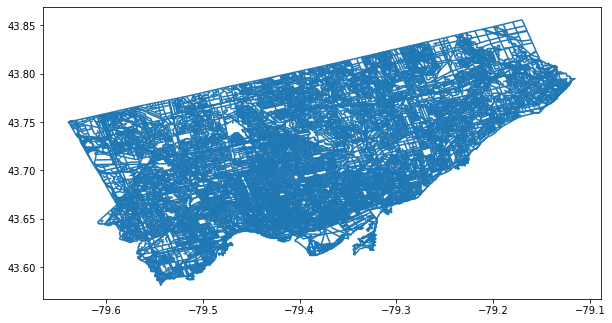

In [0]:
fig, ax = plt.subplots(figsize = (10, 10))
street_map.plot(ax = ax)

In [0]:
with open('gdrive/My Drive/Yelp Data/dfRestaurants.pickle', 'rb') as f:
    df_business = pickle.load(f)

In [0]:
df_business1 = df_business[['latitude', 'longitude']]

In [0]:
df_business1

,latitude,longitude
15,43.711399,-79.399339
25,43.669256,-79.335902
96,43.787061,-79.276166
104,43.707465,-79.394285
113,43.654067,-79.380081
...,...,...
174507,43.671578,-79.387460
174518,43.764386,-79.411206
174519,43.596858,-79.523305
174536,43.648705,-79.370885


In [0]:
with open('gdrive/My Drive/Yelp Data/topn_results_collab.pickle', 'rb') as f:
    df_collab = pickle.load(f)

In [0]:
with open('gdrive/My Drive/Yelp Data/topn_results_content.pickle', 'rb') as f:
    df_content = pickle.load(f)

In [0]:
with open('gdrive/My Drive/Yelp Data/topn_results_friends.pickle', 'rb') as f:
    df_friends = pickle.load(f)

In [0]:
crs = {'init': 'epsg:4326'}

In [0]:
geometry_collab = [Point(xy) for xy in zip(df_collab['longitude'], df_collab['latitude'])]
geo_df_collab = gpd.GeoDataFrame(df_collab, crs = crs, geometry = geometry_collab)

In [0]:
geometry_content = [Point(xy) for xy in zip(df_content['longitude'], df_content['latitude'])]
geo_df_content = gpd.GeoDataFrame(df_content, crs = crs, geometry = geometry_content)

In [0]:
geometry_friends = [Point(xy) for xy in zip(df_friends['longitude'], df_friends['latitude'])]
geo_df_friends = gpd.GeoDataFrame(df_friends, crs = crs, geometry = geometry_friends)

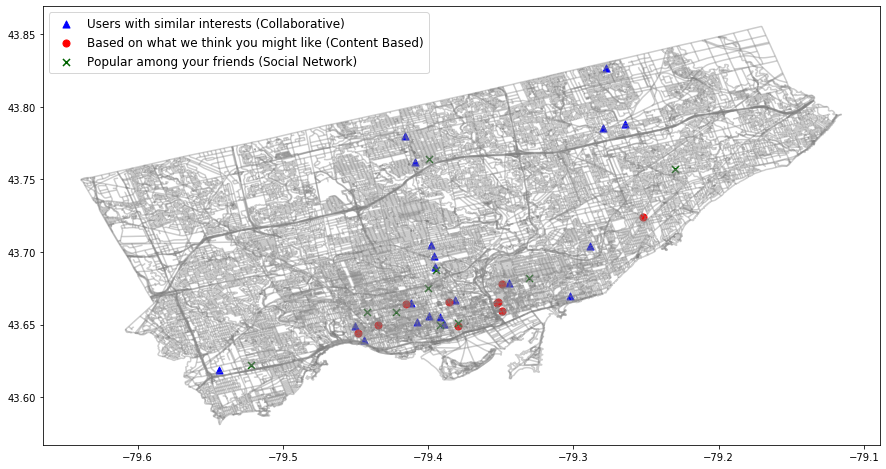

In [0]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df_collab.plot(ax = ax, markersize = 50, color = 'blue', marker = '^', label = 'Users with similar interests (Collaborative)')
geo_df_content.plot(ax = ax, markersize = 50, color = 'red', marker = 'o', label = 'Based on what we think you might like (Content Based)')
geo_df_friends.plot(ax = ax, markersize = 50, color = 'darkgreen', marker = 'x', label = 'Popular among your friends (Social Network)')

plt.legend(prop = {'size': 12})